In [323]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [324]:
#Read in the csv file and convert to a Pandas dataframe
arwu_df = pd.read_excel('./data/shanghai Ranking.xlsx')
the_df = pd.read_excel('./data/Times Higher Education.xlsx')
cwur_df = pd.read_excel('./data/World Rank University.xlsx')

In [325]:
# There is some values that have been placed in the wrong columns, so we need to fix this
# But first we need to add a new column between 'sdg-score-multi__value 3' & 'sdg-score-multi__value 4'
# and give it a value of 17 for the entire column because it's missing from the data provided
# see more https://www.timeshighereducation.com/impactrankings#


the_df.insert(the_df.columns.get_loc('sdg-score-multi__value 4'), 'sdg-score-multi__number 4', 17)

In [326]:
# Drop the column 'ranking-institution-title href' because it's not needed for this analysis given that it's an official link to the institution
the_df.drop('ranking-institution-title href', axis=1, inplace=True)

In [327]:
# A sample that if we merged the dataframes, we would have missing values
the_df.iloc[ 1407 ,  : ]


Rank                                             1001+
University Name              University of Puthisastra
Location                                      Cambodia
sdg-score-multi__number                            NaN
sdg-score-multi__value                             NaN
sdg-score-multi__number 2                          8.0
sdg-score-multi__value 2                     35.7–48.3
sdg-score-multi__number 3                          NaN
sdg-score-multi__value 3                           NaN
sdg-score-multi__number 4                           17
sdg-score-multi__value 4                      1.5–45.2
scores                                        7.9–53.8
sdg-score-multi__number 5                          NaN
sdg-score-multi__value 5                           NaN
sdg-score-multi__number 6                          NaN
sdg-score-multi__value 6                           NaN
sdg-score-multi__number 7                          NaN
sdg-score-multi__value 7                           NaN
sdg-score-

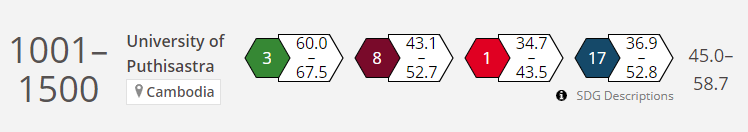

In [328]:
# A sample that if we merged the dataframes, we would have missing values & wrong values
the_df.iloc[ 1528 ,  : ]

Rank                                                             1001+
University Name              Transport and Telecommunication Institute
Location                                                        Latvia
sdg-score-multi__number                                            NaN
sdg-score-multi__value                                             NaN
sdg-score-multi__number 2                                          NaN
sdg-score-multi__value 2                                           NaN
sdg-score-multi__number 3                                          NaN
sdg-score-multi__value 3                                           NaN
sdg-score-multi__number 4                                           17
sdg-score-multi__value 4                                      1.5–45.2
scores                                                        7.9–53.8
sdg-score-multi__number 5                                          8.0
sdg-score-multi__value 5                                     35.7–48.3
sdg-sc

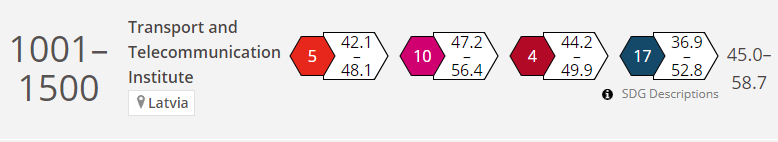

In [329]:
#First we will extract the columns that are supposed to have the missing values
the_df_1 = the_df.loc[ : ,'sdg-score-multi__number' : 'sdg-score-multi__value 4']

In [330]:
#Then we will extract the columns that have the missing values
the_df_2 = the_df.loc[ : ,'sdg-score-multi__number 5' : ]

In [331]:
"""
Function to replace NaN values in the first dataframe using values from the second dataframe row by row.
It checks each element in the first dataframe and replaces NaN values with the first available non-NaN value 
from the corresponding row in the second dataframe, proceeding in order from left to right. After using a value 
from the second dataframe, it is marked as NaN to ensure it isn't reused in the same row.
"""
def replace_nan_sequentially(df1, df2):
    combined_df = df1.copy()  # Start with the first dataframe
    for i in range(len(combined_df)):
        # Iterate over the columns in df1 for each row
        for j in range(len(combined_df.columns)):
            if pd.isna(combined_df.iloc[i, j]):  # If the value is NaN
                # Find the first non-NaN value from df2 in the corresponding row
                replacement_value = df2.iloc[i].dropna().values
                if len(replacement_value) > 0:
                    combined_df.iloc[i, j] = replacement_value[0]
                    df2.iloc[i] = df2.iloc[i].apply(lambda x: np.nan if x == replacement_value[0] else x)
    return combined_df

In [332]:
#Testing the function to see if it works
the_df_1.sample(5, random_state=20)

,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__number 4,sdg-score-multi__value 4
557,NaN,NaN,NaN,NaN,NaN,NaN,17,75.6–81.7
1528,NaN,NaN,NaN,NaN,NaN,NaN,17,1.5–45.2
1175,NaN,NaN,1.0,23.3–38.1,3.0,1.0–32.0,17,1.5–45.2
379,NaN,NaN,2.0,75.8,8.0,62.4–66.3,17,70.6–75.5
530,9.0,73.0–87.2,NaN,NaN,5.0,56.1–61.4,17,53.4–61.0


In [333]:
#Testing the function to see if it works
the_df_2.sample(5, random_state=20)

,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
557,NaN,NaN,4.0,62.6–66.5,5.0,56.1–61.4,16.0,63.7–69.9
1528,8.0,35.7–48.3,NaN,NaN,NaN,NaN,5.0,34.4–43.6
1175,11.0,20.9–38.4,NaN,NaN,NaN,NaN,NaN,NaN
379,NaN,NaN,NaN,NaN,16.0,70.0–77.0,NaN,NaN
530,NaN,NaN,NaN,NaN,3.0,68.3–73.4,NaN,NaN


In [334]:
#Testing the function to see if it works
replace_nan_sequentially(the_df_1.sample(5, random_state=20), the_df_2.sample(5, random_state=20))

,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__number 4,sdg-score-multi__value 4
557,4.0,62.6–66.5,5.0,56.1–61.4,16.0,63.7–69.9,17,75.6–81.7
1528,8.0,35.7–48.3,5.0,34.4–43.6,NaN,NaN,17,1.5–45.2
1175,11.0,20.9–38.4,1.0,23.3–38.1,3.0,1.0–32.0,17,1.5–45.2
379,16.0,70.0–77.0,2.0,75.8,8.0,62.4–66.3,17,70.6–75.5
530,9.0,73.0–87.2,3.0,68.3–73.4,5.0,56.1–61.4,17,53.4–61.0


In [335]:
# Therefore our function works as expected
# Now we will use it to replace the missing values in the 'the_df' dataframe

In [336]:
the_df.sample(5, random_state=20)

,Rank,University Name,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__number 4,sdg-score-multi__value 4,scores,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
557,401–600,University of Split,Croatia,NaN,NaN,NaN,NaN,NaN,NaN,17,75.6–81.7,66.9–72.6,NaN,NaN,4.0,62.6–66.5,5.0,56.1–61.4,16.0,63.7–69.9
1528,1001+,Transport and Telecommunication Institute,Latvia,NaN,NaN,NaN,NaN,NaN,NaN,17,1.5–45.2,7.9–53.8,8.0,35.7–48.3,NaN,NaN,NaN,NaN,5.0,34.4–43.6
1175,1001+,Federal University of Paraí­ba (UFPB),Brazil,NaN,NaN,1.0,23.3–38.1,3.0,1.0–32.0,17,1.5–45.2,7.9–53.8,11.0,20.9–38.4,NaN,NaN,NaN,NaN,NaN,NaN
379,301–400,Public University of Navarre,Spain,NaN,NaN,2.0,75.8,8.0,62.4–66.3,17,70.6–75.5,72.7–76.7,NaN,NaN,NaN,NaN,16.0,70.0–77.0,NaN,NaN
530,401–600,University of Pisa,Italy,9.0,73.0–87.2,NaN,NaN,5.0,56.1–61.4,17,53.4–61.0,66.9–72.6,NaN,NaN,NaN,NaN,3.0,68.3–73.4,NaN,NaN


In [337]:
the_df.loc[ : ,'sdg-score-multi__number' : 'sdg-score-multi__value 4'] = replace_nan_sequentially(the_df_1, the_df_2)

In [338]:
the_df.sample(5, random_state=20)

,Rank,University Name,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__number 4,sdg-score-multi__value 4,scores,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
557,401–600,University of Split,Croatia,4.0,62.6–66.5,5.0,56.1–61.4,16.0,63.7–69.9,17,75.6–81.7,66.9–72.6,NaN,NaN,4.0,62.6–66.5,5.0,56.1–61.4,16.0,63.7–69.9
1528,1001+,Transport and Telecommunication Institute,Latvia,8.0,35.7–48.3,5.0,34.4–43.6,NaN,NaN,17,1.5–45.2,7.9–53.8,8.0,35.7–48.3,NaN,NaN,NaN,NaN,5.0,34.4–43.6
1175,1001+,Federal University of Paraí­ba (UFPB),Brazil,11.0,20.9–38.4,1.0,23.3–38.1,3.0,1.0–32.0,17,1.5–45.2,7.9–53.8,11.0,20.9–38.4,NaN,NaN,NaN,NaN,NaN,NaN
379,301–400,Public University of Navarre,Spain,16.0,70.0–77.0,2.0,75.8,8.0,62.4–66.3,17,70.6–75.5,72.7–76.7,NaN,NaN,NaN,NaN,16.0,70.0–77.0,NaN,NaN
530,401–600,University of Pisa,Italy,9.0,73.0–87.2,3.0,68.3–73.4,5.0,56.1–61.4,17,53.4–61.0,66.9–72.6,NaN,NaN,NaN,NaN,3.0,68.3–73.4,NaN,NaN


In [339]:
# Now we will remove the columns that we extracted the data from i.e 'sdg-score-multi__number 5' : 'sdg-score-multi__value 8'
the_df.drop(the_df.loc[ : ,'sdg-score-multi__number 5' : 'sdg-score-multi__value 8'].columns, axis=1, inplace=True)

In [340]:
# Now we will check for missing values in the dataframe
the_df.isnull().sum()

Rank                           0
University Name                0
Location                      91
sdg-score-multi__number       17
sdg-score-multi__value        21
sdg-score-multi__number 2     66
sdg-score-multi__value 2      68
sdg-score-multi__number 3    201
sdg-score-multi__value 3     211
sdg-score-multi__number 4      0
sdg-score-multi__value 4       8
scores                         0
dtype: int64

In [341]:
the_df.shape

(1591, 12)

In [342]:
the_df['Location'].value_counts()

Location
Turkey                79
Japan                 78
Pakistan              72
India                 66
Thailand              65
                      ..
Oman                   1
Cambodia               1
Haiti                  1
Moldova                1
Dominican Republic     1
Name: count, Length: 110, dtype: int64

In [343]:
the_df['sdg-score-multi__value'].unique()

array(['80.3', '97.4', '90.6', '94.1', '92.8', '95.4', '99.4', '92.1',
       '91.8', '97.7', '95.0', '93.1', '88.5', '88.9', '99.9', '99.0',
       '92.7', '92.6', '87.7', '91.0', '96.2', '99.6', '88.1', '86.2',
       '93.5', '91.3', '91.5', '84.1', '88.4', '99.7', '94.7', '86.3',
       '84.6', '96.6', '87.9', '89.9', '89.6', '99.3', '98.3', '90.7',
       '92.0', '90.0', '87.3', '80.8', '81.4', '93.6', '80.5', '85.3',
       '79.1', '99.1', '84.7', '93.0', '82.1', '73.3', '92.9', '81.1',
       '88.7', '86.9', '86.5', '80.0', '74.9', '71.1', '68.3–73.4',
       '87.5', '71.9', '77.6', '81.3', '87.6', '82.3', '91.1', '85.0',
       '89.2', '79.2', '85.8', '93.4', '89.1', '78.1', '88.3', '70.7',
       '78.8', '85.9', '95.9', '83.8', '73.1', '86.4', '82.7',
       '73.5–78.9', '86.1', '81.0', '76.7', '70.9', '77.1', '83.5',
       '81.5', '83.0', '99.8', '79.7', '75.6', '83.7', '75.5',
       '67.1–76.0', '88.0', '77.7', '73.0–87.2', '92.3', '68.7', '75.1',
       '76.9', '97.5', '77

In [344]:
the_df.sample(5, random_state=245)

,Rank,University Name,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__number 4,sdg-score-multi__value 4,scores
1069,1001+,Banasthali University,India,4.0,35.8–43.5,NaN,NaN,9.0,51.0–60.2,17,1.5–45.2,7.9–53.8
490,401–600,University of León,Spain,5.0,56.1–61.4,16.0,63.7–69.9,1.0,60.3–68.4,17,61.1–70.5,66.9–72.6
1,2,University of Manchester,United Kingdom,15.0,97.4,12.0,92.9,11.0,92.2,17,94.8,97.5
169,101–200,Sapienza University of Rome,Italy,14.0,86.2,5.0,72.8,9.0,92.0,17,75.6–81.7,82.2–88.2
1268,1001+,Kazakh-British Technical University,Kazakhstan,5.0,22.1–34.3,8.0,35.7–48.3,7.0,38.7–51.8,17,61.1–70.5,7.9–53.8


In [345]:
# fill NaN values in specified columns with suited values 
the_df['Location'] = the_df['Location'].fillna('Unknown')
the_df['sdg-score-multi__number'] = the_df['sdg-score-multi__number'].fillna(-1.0)
the_df['sdg-score-multi__value'] = the_df['sdg-score-multi__value'].fillna('0-0')
the_df['sdg-score-multi__number 2'] = the_df['sdg-score-multi__number 2'].fillna(-1.0)
the_df['sdg-score-multi__value 2'] = the_df['sdg-score-multi__value 2'].fillna('0-0')
the_df['sdg-score-multi__number 3'] = the_df['sdg-score-multi__number 3'].fillna(-1.0)
the_df['sdg-score-multi__value 3'] = the_df['sdg-score-multi__value 3'].fillna('0-0')
the_df['sdg-score-multi__value 4'] = the_df['sdg-score-multi__value 4'].fillna('0-0')




In [346]:
the_df.sample(5, random_state=245)

,Rank,University Name,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__number 4,sdg-score-multi__value 4,scores
1069,1001+,Banasthali University,India,4.0,35.8–43.5,-1.0,0-0,9.0,51.0–60.2,17,1.5–45.2,7.9–53.8
490,401–600,University of León,Spain,5.0,56.1–61.4,16.0,63.7–69.9,1.0,60.3–68.4,17,61.1–70.5,66.9–72.6
1,2,University of Manchester,United Kingdom,15.0,97.4,12.0,92.9,11.0,92.2,17,94.8,97.5
169,101–200,Sapienza University of Rome,Italy,14.0,86.2,5.0,72.8,9.0,92.0,17,75.6–81.7,82.2–88.2
1268,1001+,Kazakh-British Technical University,Kazakhstan,5.0,22.1–34.3,8.0,35.7–48.3,7.0,38.7–51.8,17,61.1–70.5,7.9–53.8


In [347]:
the_df.isnull().sum()

Rank                         0
University Name              0
Location                     0
sdg-score-multi__number      0
sdg-score-multi__value       0
sdg-score-multi__number 2    0
sdg-score-multi__value 2     0
sdg-score-multi__number 3    0
sdg-score-multi__value 3     0
sdg-score-multi__number 4    0
sdg-score-multi__value 4     0
scores                       0
dtype: int64

In [221]:
the_df['Location'].value_counts()

Location
Unknown               91
Turkey                79
Japan                 78
Pakistan              72
India                 66
                      ..
Oman                   1
Cambodia               1
Haiti                  1
Moldova                1
Dominican Republic     1
Name: count, Length: 111, dtype: int64

In [349]:
# Change the data types of the columns to the appropriate data types
the_df['sdg-score-multi__number'] = the_df['sdg-score-multi__number'].astype(int)
the_df['sdg-score-multi__number 2'] = the_df['sdg-score-multi__number 2'].astype(int)
the_df['sdg-score-multi__number 3'] = the_df['sdg-score-multi__number 3'].astype(int)

In [350]:
the_df.dtypes

Rank                         object
University Name              object
Location                     object
sdg-score-multi__number       int64
sdg-score-multi__value       object
sdg-score-multi__number 2     int64
sdg-score-multi__value 2     object
sdg-score-multi__number 3     int64
sdg-score-multi__value 3     object
sdg-score-multi__number 4     int64
sdg-score-multi__value 4     object
scores                       object
dtype: object

In [377]:
# Scores column has a range of values, we will split the values into two columns and take the average of the two values
the_df['avg_scores'] = the_df['scores'].apply(
    lambda x: (float(x.split('–')[0]) + float(x.split('–')[1])) / 2 if '–' in x else float(x)
)


In [379]:
the_df.dtypes

Rank                          object
University Name               object
Location                      object
sdg-score-multi__number        int64
sdg-score-multi__value        object
sdg-score-multi__number 2      int64
sdg-score-multi__value 2      object
sdg-score-multi__number 3      int64
sdg-score-multi__value 3      object
sdg-score-multi__number 4      int64
sdg-score-multi__value 4      object
scores                        object
avg_scores                   float64
dtype: object

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [66]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [1]:
#Display number missing values per column

In [68]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [2]:
# check columns types 

In [33]:
# go to clean them 

In [3]:
# check outliers 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [23]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [24]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [25]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [80]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [ ]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.